In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity, manhattan_distances
from sklearn.metrics import silhouette_score
from sklearn.decomposition import  PCA
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler

In [3]:
table = pd.read_csv('./iris.txt', header=None, sep=" ")

In [4]:
data_np = table.to_numpy()

In [5]:
pca = TSNE(n_components=2, init='pca' ,n_iter=10000, perplexity=15)
data = pca.fit_transform(data_np)
scaler = MinMaxScaler(feature_range=(1,100))
data = scaler.fit_transform(data)

/Users/bhabaranjanpanigrahi/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
/Users/bhabaranjanpanigrahi/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:996: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


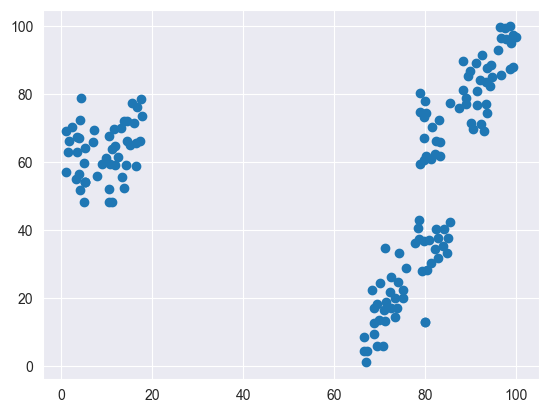

In [6]:
plt.scatter(data[:,0],data[:,1])

In [7]:
def generateKCentroid(data, k):
    random_index = [ np.random.randint(0,data.shape[0],size=data.shape[1]) for i in range(k)]
    centroids = []
    for i in range(len(random_index)):
        curr = random_index[i]
        build_centroid = []
        for j in range(len(curr)):
            build_centroid.append(data[curr[j],j])
        centroids.append(build_centroid)
    return np.array(centroids)

In [8]:
def calculateInertia(data_set, centroid, cluster_assigned):
    sum_of_squared_distance = 0
    cluster_assigned = np.array(cluster_assigned)
    centroid = np.array(centroid)
    for i in range(cluster_assigned.shape[0]):
        distance = euclidean_distances(data_set[i].reshape(1,-1), centroid[cluster_assigned[i]].reshape(1,-1))
        sum_of_squared_distance += (distance*distance)
    return sum_of_squared_distance

In [9]:
from sklearn.metrics.pairwise import euclidean_distances
def runKmeanClustering(cluster_size, train_data, centroids):
    iteration = 0
    while True:
        iteration += 1
        restart = False
        distance_e = euclidean_distances(train_data, centroids)
        distance = distance_e

        cluster_assigned  = np.argmin(distance, axis=1)
        cluster_bucket = {}

        for i in range(cluster_size):
            cluster_bucket[i] = []

        for index in range(cluster_assigned.shape[0]):
            cluster_bucket[cluster_assigned[index]].append(train_data[index])

        for cluster in range(cluster_size):
            if len(cluster_bucket[cluster]) == 0:
                print("cluster with ID=====> "+ str(cluster) + " does not have any data points" )
                print("re-initializing centroids")
                centroids = generateKCentroid(data, cluster_size)
                restart = True
                break

        if restart:
            print("re-staring k-means")
            continue
        centroid_of_cluster = []

        for cluster in range(cluster_size):
            centroid_of_cluster.append(np.mean(np.array(cluster_bucket[cluster]) ,axis=0))

        if np.array_equal(centroid_of_cluster, centroids):
            return centroids, cluster_assigned
        else:
            centroids = np.array(centroid_of_cluster)

In [15]:
def runKmeansWithParams(train_data, num_cluster, init_cluster_size, step_increament = 1, num_iteration = 10):
    choosen_best_cluster_and_inertia = []
    cluster_to_process = []
    init_cluster = init_cluster_size

    for cluster in range(num_cluster):
        cluster_to_process.append(init_cluster + step_increament)
        init_cluster += step_increament

    for k in cluster_to_process:
        save_cluster =[]
        save_intertia = []
        print("cluster_size:>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>", k)
        for i in range(num_iteration):
            print("iteration:================================================>", i)
            k_centroids, assigned_cluster = runKmeanClustering(k, train_data, generateKCentroid(train_data,k))
            save_cluster.append(assigned_cluster)
            save_intertia.append(calculateInertia(train_data,k_centroids,assigned_cluster))

        index = np.argmin(save_intertia)
        choosen_best_cluster_and_inertia.append((save_cluster[index], save_intertia[index]))

    return choosen_best_cluster_and_inertia

In [56]:
resulting_cluster = runKmeansWithParams(data,1,3,0,400)

cluster_size:>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 3
iteration:================================================> 0
iteration:================================================> 1
cluster with ID=====> 2 does not have any data points
re-initializing centroids
re-staring k-means
iteration:================================================> 2
iteration:================================================> 3
iteration:================================================> 4
iteration:================================================> 5
iteration:================================================> 6
iteration:================================================> 7
iteration:================================================> 8
iteration:================================================> 9
iteration:================================================> 10
iteration:================================================> 11
iteration:================================================> 12
iteration:================

In [90]:
test_cluter = runKmeansWithParams(data,8,1,1,50)

cluster_size:>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>> 2
iteration:================================================> 0
iteration:================================================> 1
iteration:================================================> 2
iteration:================================================> 3
iteration:================================================> 4
iteration:================================================> 5
iteration:================================================> 6
iteration:================================================> 7
iteration:================================================> 8
iteration:================================================> 9
iteration:================================================> 10
iteration:================================================> 11
iteration:================================================> 12
iteration:================================================> 13
iteration:================================================> 14

In [91]:
silhouette_score(data, resulting_cluster[0][0])

0.7522649

In [92]:
test_cluter

[(array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
         1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
         0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]),
  array([[105411.31]], dtype=float32)),
 (array([0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
         0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 0, 0, 2, 2,
         2, 2, 2, 2, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 1, 0, 0, 0, 0,
         0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
         0, 0, 0, 0, 0, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0, 2, 2, 2, 2, 2, 2, 2,
         2, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 1

In [93]:
silhouette_metric = []
inertia = []

for i in range(1,8):
  silhouette_metric.append(silhouette_score(data, test_cluter[i][0]))
  inertia.append(test_cluter[i][1][0][0])

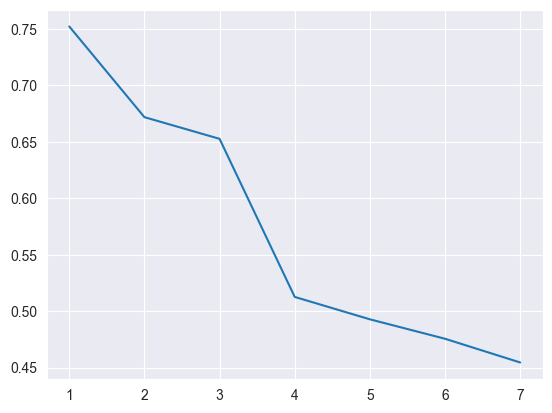

In [95]:
plt.plot(range(1,8), silhouette_metric)

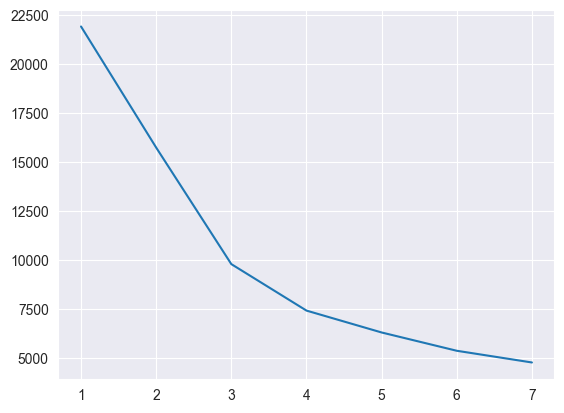

In [98]:
plt.plot(range(1,8), inertia)

In [99]:
z = silhouette_score(data, resulting_cluster[0][0])
print(z)

0.7522649


In [102]:
choosen_cluster = resulting_cluster[0][0]
choosen_cluster = choosen_cluster + 1

In [105]:
outfile = open('./iris_results.csv','w')
out = csv.writer(outfile)
out.writerows(map(lambda x: [x], choosen_cluster))
outfile.close()